## MP1: Getting Data Driven Answers from Surveys

---

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
exerciseDF = pd.read_csv("Exercise Habits in College Students.csv")
# exerciseDF.head()

---

### WHO: Demographic Analysis

**Q1:** Age Range Distribution
> A total of 16 participants completed the survey. Most participants were ages 21-23 (87.5%) followed by ages 18-20 (12.5%).


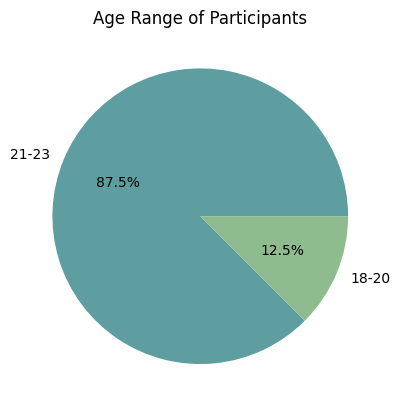

In [93]:
age_counts = exerciseDF["What is your age range?"].value_counts()

plt.pie(
    age_counts,
    labels=age_counts.index,
    colors=['cadetblue', 'darkseagreen'],
    autopct="%1.1f%%"
)
plt.title("Age Range of Participants")
plt.show()


---

**Q2:** Academic Year Distribution
> Most participants were Seniors (56.2%) followed by Sophomores (18.8%), Juniors (12.5%), and Graduate Students (12.5%)

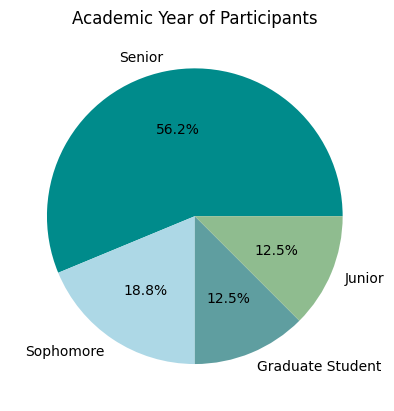

In [92]:
year_counts = exerciseDF["What is your academic year?"].value_counts()

plt.pie(
    year_counts,
    labels=year_counts.index,
    colors=['darkcyan', 'lightblue', 'cadetblue', 'darkseagreen'],
    autopct="%1.1f%%"
)
plt.title("Academic Year of Participants")
plt.show()


---

**Q3:** Gender Identity Distribution
> Most participants identified as Male (50.0%) followed by identifying as Women (43.8%) and Other (6.2%)

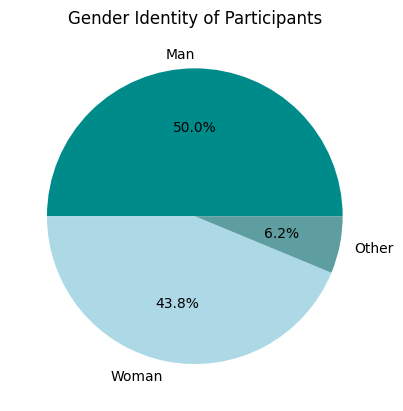

In [109]:
gender_counts = exerciseDF["What is your gender identity?"].value_counts()

plt.pie(
    gender_counts,
    labels=gender_counts.index,
    colors=['darkcyan', 'lightblue', 'cadetblue'],
    autopct="%1.1f%%"
)
plt.title("Gender Identity of Participants")
plt.show()


---

### WHAT: Primary Exercise Type

**Q4:** What type of exercise do participants do most often?

> Most participants had walking as their primary exercise type (68.8%), followed by strength training (43.8%) and intensive cardio (37.5%). No participants selected group fitness classes as their main type of exercise.

> For multi-select questions, percentages represent the proportion of participants who selected each option.

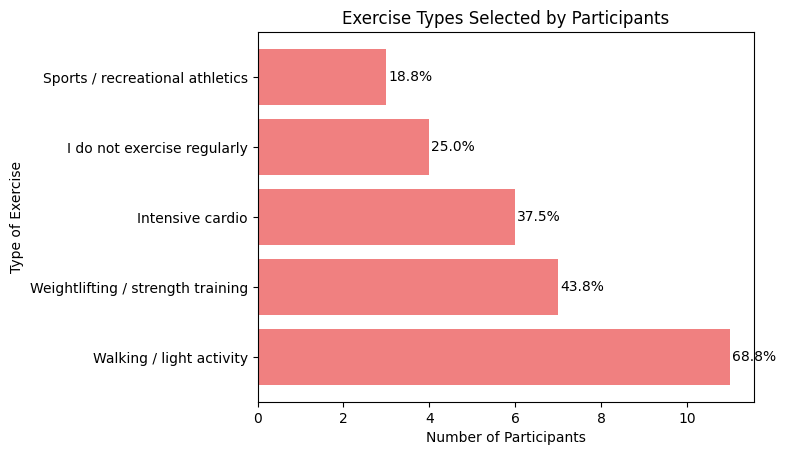

In [110]:
# rename "intensive cardio (running, cycling, etc" to "intensive cardio" to seperate by commas
exerciseDF["What type of exercise do you do most often?"] = (
    exerciseDF["What type of exercise do you do most often?"]
    .str.replace("Intensive cardio (running, cycling, etc.)", "Intensive cardio")
)

# split the multiple choice responses into separate columns
exercise_series = exerciseDF["What type of exercise do you do most often?"].str.get_dummies(sep=", ")

exercise_counts = exercise_series.sum().sort_values(ascending=False)

total_participants = len(exerciseDF)
exercise_percent = (exercise_counts / total_participants) * 100

plt.barh(exercise_counts.index, exercise_counts.values, color='lightcoral')
plt.xlabel("Number of Participants")
plt.ylabel("Type of Exercise")
plt.title("Exercise Types Selected by Participants")
# plt.xticks(rotation=45, ha="right") # rotate x-axis labels for better readability

for i, (count, pct) in enumerate(zip(exercise_counts.values, exercise_percent.values)):
    plt.text(count + 0.05, i, f"{pct:.1f}%", va='center')

plt.show()


---

### WHEN: Exercise Timing

**Q5:** When do participants usually exercise?
> Most participants exercised in the Evening (25.0%), followed by Afternoon (18.8%) and not exercising regularly (18.8%)

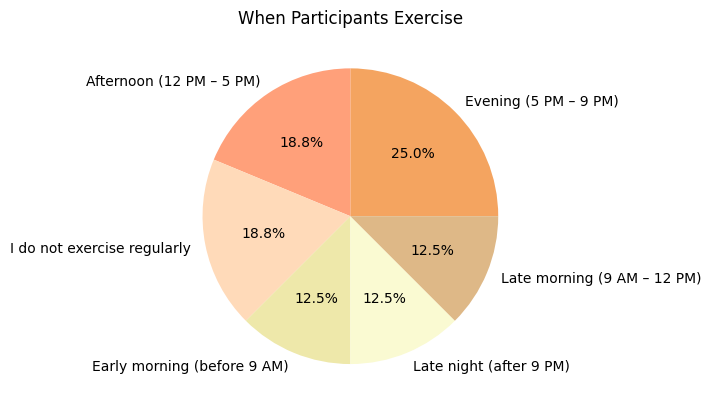

In [87]:
when_counts = exerciseDF["When do you usually exercise?"].value_counts()

plt.pie(
    when_counts,
    labels=when_counts.index,
    colors=['sandybrown', 'lightsalmon', 'peachpuff', 'palegoldenrod', 'lightgoldenrodyellow', 'burlywood'],
    autopct="%1.1f%%"
)
plt.title("When Participants Exercise")
plt.show()


---

**Q6:** Days per Week Participants Exercise
> Most participants exercised 5-6 days per week (37.5%), followed by 3-4 days per week (31.2%) and 0 (18.8%)

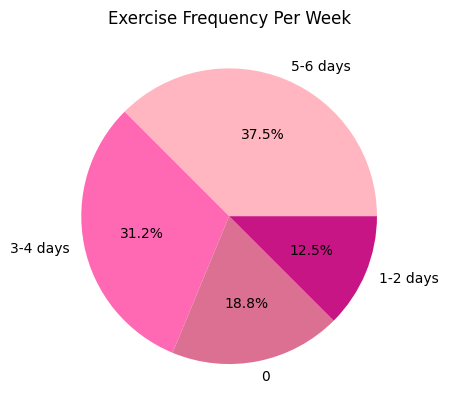

In [105]:
days_counts = exerciseDF["How many days per week do you typically exercise?"].value_counts()

plt.figure()
plt.pie(
    days_counts,
    labels=days_counts.index,
    #pink color scheme
    colors=['lightpink', 'hotpink', 'palevioletred', 'mediumvioletred'],
    autopct="%1.1f%%"
)
plt.title("Exercise Frequency Per Week")
plt.show()


---

### WHERE: Exercise Location

**Q7:** Where do participants usually exercise?
> Most participants exercised Outdoors (43.8%), followed by a Campus Gym (37.5%) and a Commercial Gym (18.8%)

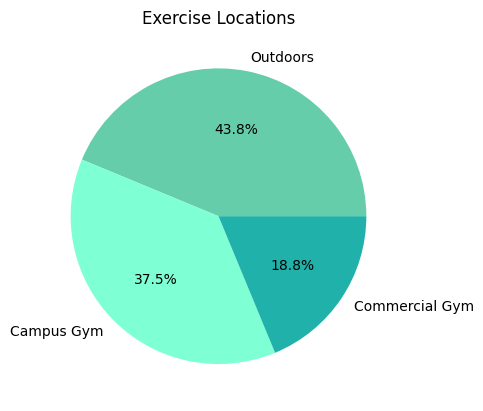

In [86]:
where_counts = exerciseDF["Where do you usually exercise?"].value_counts()

plt.pie(
    where_counts,
    labels=where_counts.index,
    colors=['mediumaquamarine', 'aquamarine', 'lightseagreen'],
    autopct="%1.1f%%"
)
plt.title("Exercise Locations")
plt.show()


---

### WHY: Motivation Analysis

**Q8:** Why do participants primarily exercise?

> Most participants exercised for Appearance (68.8%) and Physical Health (68.8%), followed by Mental Health (62.5%) and Athletic Performance (25.0%). No participants selected 'Doctor or professional recommendation' as their main reason for exercising. 


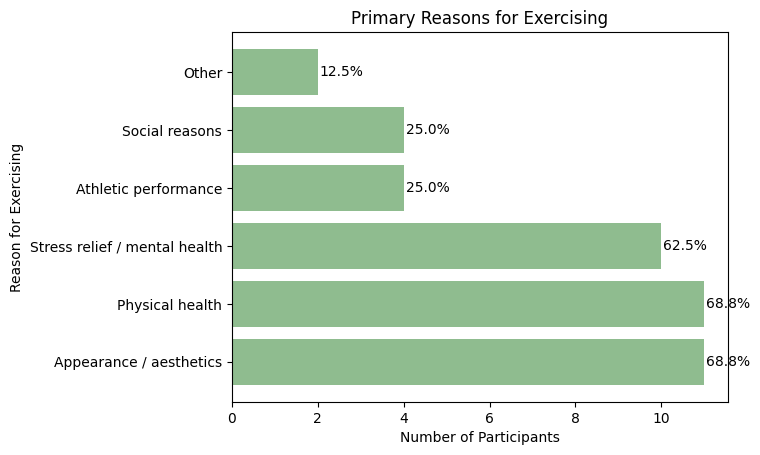

In [111]:
why_series = exerciseDF["Why do you primarily exercise?"].str.get_dummies(sep=", ")

why_primary = why_series.sum().sort_values(ascending=False)

total_participants = len(exerciseDF)
why_percent = (why_primary / total_participants) * 100

plt.barh(why_primary.index, why_primary.values, color='darkseagreen')
plt.xlabel("Number of Participants")
plt.ylabel("Reason for Exercising")
plt.title("Primary Reasons for Exercising")

# add percentage labels
for i, (count, pct) in enumerate(zip(why_primary.values, why_percent.values)):
    plt.text(count + 0.05, i, f"{pct:.1f}%", va='center')

plt.show()


---

**Q9:** Why do participants exercise at their chosen time?
> Most participants exercised at their chosen time for their Schedule (75.0%), followed by Routine (37.5%) and Consistency (31.2%).

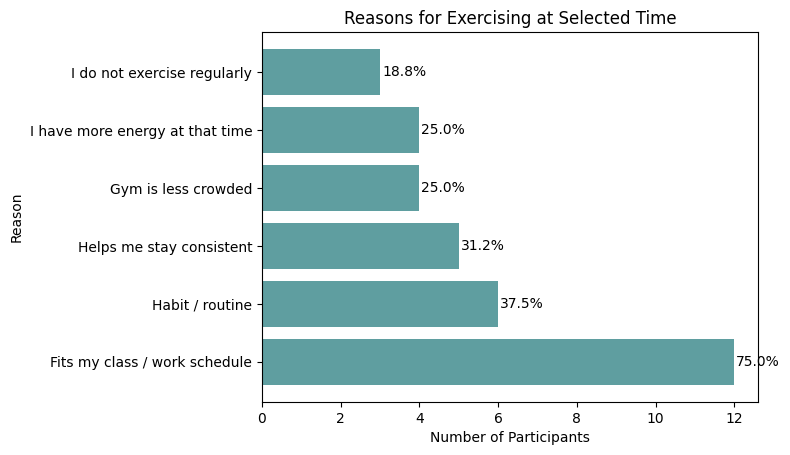

In [112]:
why_time_series = exerciseDF["Why do you exercise at the time you selected?"].str.get_dummies(sep=", ")

why_time_counts = why_time_series.sum().sort_values(ascending=False)

total_participants = len(exerciseDF)
why_time_percent = (why_time_counts / total_participants) * 100

plt.barh(why_time_counts.index, why_time_counts.values, color='cadetblue')
plt.xlabel("Number of Participants")
plt.ylabel("Reason")
plt.title("Reasons for Exercising at Selected Time")

# add percentage labels
for i, (count, pct) in enumerate(zip(why_time_counts.values, why_time_percent.values)):
    plt.text(count + 0.05, i, f"{pct:.1f}%", va='center')

plt.show()


---

**Q10:** Why do participants exercise in the location they selected?

> Most participants exercised at their chosen location for their Convenience (87.5%), followed by Cost (31.2%) and Social Environment (18.8%). No participants selected safety as a reason for choosing their workout location.

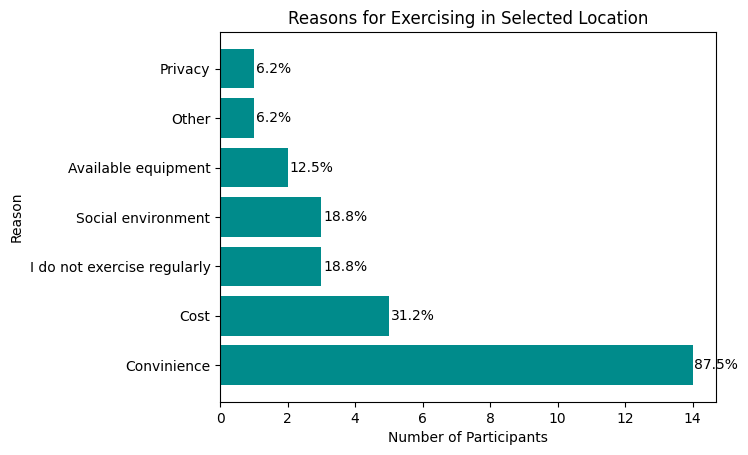

In [113]:
why_location_series = exerciseDF[
    "Why do you exercise in the location you selected?"
].str.get_dummies(sep=", ")

why_location_counts = why_location_series.sum().sort_values(ascending=False)

total_participants = len(exerciseDF)
why_loc_percent = (why_location_counts / total_participants) * 100

plt.barh(why_location_counts.index, why_location_counts.values, color='darkcyan')
plt.xlabel("Number of Participants")
plt.ylabel("Reason")
plt.title("Reasons for Exercising in Selected Location")

# add percentage labels
for i, (count, pct) in enumerate(zip(why_location_counts.values, why_loc_percent.values)):
    plt.text(count + 0.05, i, f"{pct:.1f}%", va='center')

plt.show()


---

**Q11:** Barriers to Exercising More Often

> Most participants didn't exercise more often because of Time (68.8%), followed by Motivation (50.0%) and Feeling Satisfied With Their Current Routine (25.0%). No participants selected cost as a barrier to their fitness.

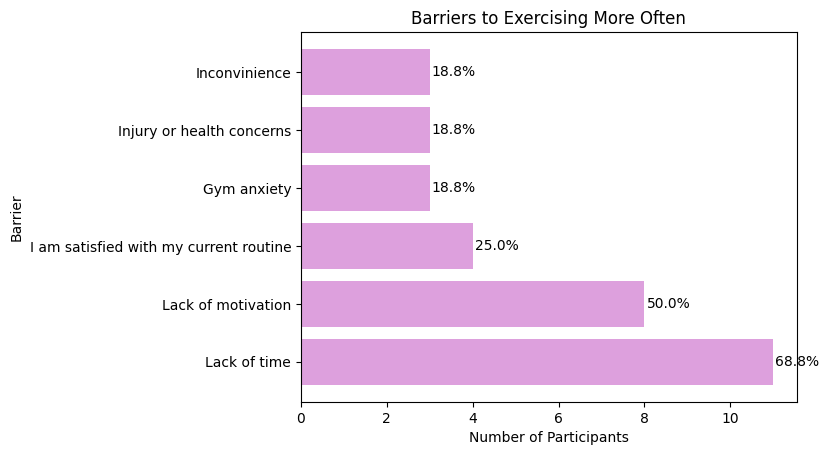

In [114]:
barrier_series = exerciseDF[
    "What prevents you from exercising more often?"
].str.get_dummies(sep=", ")

barrier_counts = barrier_series.sum().sort_values(ascending=False)

total_participants = len(exerciseDF)
barrier_percent = (barrier_counts / total_participants) * 100

plt.barh(barrier_counts.index, barrier_counts.values, color='plum')
plt.xlabel("Number of Participants")
plt.ylabel("Barrier")
plt.title("Barriers to Exercising More Often")

# add percentage labels
for i, (count, pct) in enumerate(zip(barrier_counts.values, barrier_percent.values)):
    plt.text(count + 0.05, i, f"{pct:.1f}%", va='center')

plt.show()


---

### How

The survey was created using Google Forms and distributed online to college students through class group chats and personal networks. Participants had several days to complete the survey, and responses were collected anonymously with a disclaimer stating the data would be shared with the instructor.

Survey responses were exported as a CSV file and analyzed in Python using a Jupyter Notebook. The pandas library was used for data cleaning and calculating percentages, while matplotlib was used to generate visualizations summarizing trends in exercise habits, timing, locations, and motivations.

A limitation of this study is the small and relatively homogeneous sample, which may limit generalizability. Additionally, responses were self-reported. Future studies could include a larger and more diverse population and collect numerical measures such as workout duration or intensity for deeper analysis.

---

### Discussion & Conclusion

Several trends emerged from the survey results. Most participants exercise 3–4 days per week, with physical health and stress relief being the most common motivations. Exercise timing appears strongly influenced by class and work schedules, suggesting convenience plays a major role in maintaining consistency. Campus gyms and outdoor locations were the most popular exercise settings, primarily due to accessibility and cost. Overall, the data suggests that convenience (both in timing and location) is a dominant factor influencing exercise habits among college students.

A limitation of this study is the small sample size and the fact that most respondents were college students in similar age ranges, which may limit generalizability. Future studies could include a larger and more diverse population and collect numerical data on workout duration or intensity for deeper analysis.
